Epoch 1/10


/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 779us/step - accuracy: 0.6523 - loss: 0.6205 - val_accuracy: 0.6640 - val_loss: 0.6077
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 762us/step - accuracy: 0.6633 - loss: 0.6103 - val_accuracy: 0.6643 - val_loss: 0.6063
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 745us/step - accuracy: 0.6648 - loss: 0.6099 - val_accuracy: 0.6648 - val_loss: 0.6053
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 726us/step - accuracy: 0.6653 - loss: 0.6085 - val_accuracy: 0.6643 - val_loss: 0.6059
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 748us/step - accuracy: 0.6654 - loss: 0.6082 - val_accuracy: 0.6655 - val_loss: 0.6046
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 749us/step - accuracy: 0.6658 - loss: 0.6074 - val_accuracy: 0.6661 - val_loss: 0.6039
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 748us/step - accuracy: 0.6658 - loss: 0.6071 - val_accuracy: 0.6656 - val_loss: 0.6046
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 726us/step - accuracy: 0.6661 - loss: 0.60

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 3, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         9,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,873 (116.70 KB)

 Trainable params: 9,957 (38.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,916 (77.80 KB)

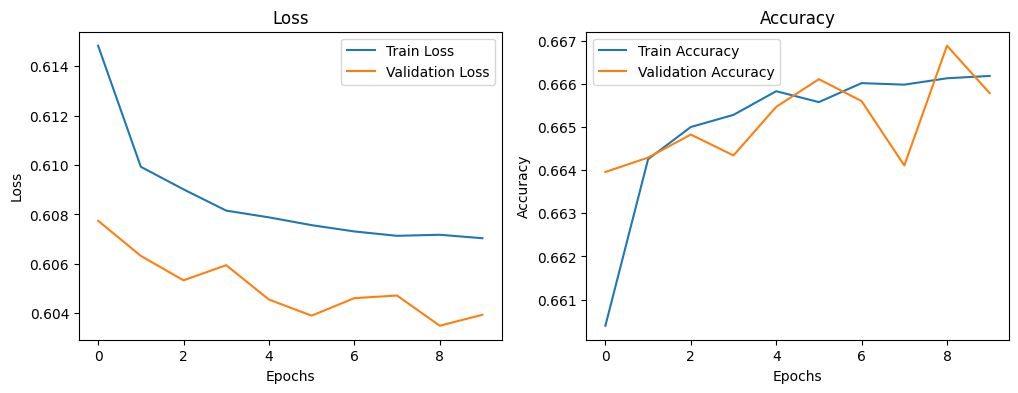

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 380us/step - accuracy: 0.6657 - loss: 0.6040
Test Loss: 0.6039332747459412
Test Accuracy: 0.6657833456993103


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 파일 로드
normal_data = pd.read_csv('./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_19.csv')
faulty_data = pd.read_csv('./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv')

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
faulty_data['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, faulty_data], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# CNN 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류 출력 레이어

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
#model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


# 모델을 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.
Epoch 1/10


/Users/kimdozz0/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18750/18750 ━━━━━━━━━━━━━━━━━━━━ 19s 946us/step - accuracy: 0.3228 - loss: 1.5137 - val_accuracy: 0.3312 - val_loss: 1.5008
Epoch 2/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 17s 915us/step - accuracy: 0.3315 - loss: 1.5021 - val_accuracy: 0.3324 - val_loss: 1.4991
Epoch 3/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 17s 927us/step - accuracy: 0.3309 - loss: 1.5019 - val_accuracy: 0.3330 - val_loss: 1.4992
Epoch 4/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 17s 891us/step - accuracy: 0.3325 - loss: 1.5012 - val_accuracy: 0.3335 - val_loss: 1.4988
Epoch 5/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 17s 929us/step - accuracy: 0.3319 - loss: 1.5013 - val_accuracy: 0.3318 - val_loss: 1.5007
Epoch 6/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 18s 935us/step - accuracy: 0.3313 - loss: 1.5008 - val_accuracy: 0.3326 - val_loss: 1.4985
Epoch 7/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.3321 - loss: 1.5004 - val_accuracy: 0.3337 - val_loss: 1.4980
Epoch 8/10
18750/18750 ━━━━━━━━━━━━━━━━━━━━ 17s 919us/step - accurac

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 3, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,817 (300.07 KB)

 Trainable params: 25,605 (100.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,212 (200.05 KB)

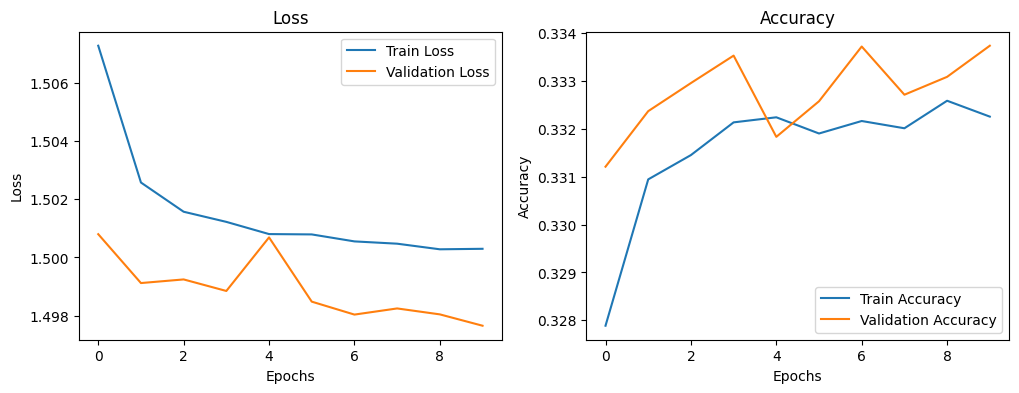

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 4s 392us/step - accuracy: 0.3330 - loss: 1.4991
Test Loss: 1.4976468086242676
Test Accuracy: 0.3337366580963135


In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt

# GPU 설정
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) == 0:
    print("GPU가 없거나 설정되지 않았습니다. CPU로 계속 진행합니다.")
else:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 데이터 파일 로드
# 각 고장 유형에 대한 데이터가 다른 폴더에 위치하는 경우를 가정
# 각 폴더에서 데이터를 로드하고 레이블을 할당한 후 데이터 결합

# 정상 데이터에 레이블 0(정상) 할당
normal_data = pd.read_csv('./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv')
normal_data['label'] = 'normal'

# 각 고장 유형에 대한 데이터를 로드하고 해당 레이블 할당
faulty_data1 = pd.read_csv('./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_19.csv')
faulty_data1['label'] = 'faulty_type_1'

faulty_data2 = pd.read_csv('./csv/5000hz/300rpm/300rpm oxidation and corrosion/stream2024_4_23_1_19.csv')
faulty_data2['label'] = 'faulty_type_2'

faulty_data3 = pd.read_csv('./csv/5000hz/300rpm/300rpm lack of lubrication/stream2024_4_23_2_11.csv')
faulty_data3['label'] = 'faulty_type_3'

faulty_data4 = pd.read_csv('./csv/5000hz/300rpm/300rpm carriage damage/stream2024_4_23_2_59.csv')
faulty_data4['label'] = 'faulty_type_4'

# 데이터 결합
combined_data = pd.concat([normal_data, faulty_data1, faulty_data2, faulty_data3, faulty_data4], ignore_index=True)

# X, Y, Z 축 데이터와 레이블 선택
features = combined_data[['motor1_x', 'motor1_y', 'motor1_z']]
labels = combined_data['label']

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(features)

# 레이블 인코딩
encoder = LabelEncoder()
y = encoder.fit_transform(labels)
Y_train = to_categorical(y)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# 1D CNN 입력을 위해 데이터 형태 변경
# (샘플 수, 시퀀스 길이, 채널 수)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
# 모델 생성
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))  # 다중 클래스 분류

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_test, Y_test))


# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [17]:
import tensorflow as tf
print("Available GPUs:", len(tf.config.experimental.list_physical_devices('GPU')))


Available GPUs: 0
